# Import Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
import warnings

import scipy
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

np.random.seed(123)

model_df = pd.read_csv('Model Dataset')
print(model_df.shape)
model_df.head()

(657, 38)


,Unnamed: 0,ID,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
0,0,1_B,0.000000,0.235955,0.359551,0.404494,0.534,0.000,0.000,0.0,0.0,0.0,0.192,0.0,0.0000,0.0,1.30,0.010,0.126,0.066,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.000,0.067,0.000,0.000,0.030,0.026,0.017,0.000,0.000,0.69
1,1,2_B,0.062102,0.738022,0.016245,0.183632,4.863,0.013,0.029,0.0,0.0,0.0,0.000,0.0,0.0115,0.0,2.76,0.003,0.000,0.196,2.989,0.203,0.26,0.009,0.063,0.0,0.0,0.0,0.537,0.188,0.000,0.070,0.147,0.058,0.075,0.000,0.000,13.42
2,2,3_B,0.020291,0.894826,0.016571,0.068312,2.957,0.000,0.013,0.0,0.0,0.0,0.000,0.0,0.0000,0.0,3.03,0.035,0.000,0.012,1.927,0.057,0.00,0.000,0.000,0.0,0.0,0.0,0.000,0.023,0.719,0.031,0.000,0.075,0.000,0.047,0.018,8.96
3,3,4_B,0.238462,0.407692,0.094872,0.258974,0.390,0.000,0.000,0.0,0.0,0.0,0.037,0.0,0.0050,0.0,1.72,0.003,0.000,0.028,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.159,0.000,0.000,0.065,0.000,0.093,0.000,0.67
4,4,5_B,0.000000,0.896653,0.027299,0.076048,3.077,0.000,0.000,0.0,0.0,0.0,0.047,0.0,0.0180,0.0,3.09,0.000,0.071,0.106,2.366,0.000,0.00,0.037,0.000,0.0,0.0,0.0,0.000,0.000,0.322,0.000,0.000,0.068,0.024,0.000,0.000,9.51


# Modeling

## Remove Outliers

In [3]:
model_df.describe()

,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,0.164221,0.562368,0.097642,0.174883,7.039078,0.278236,0.027437,0.003476,0.025985,0.026689,0.187169,0.009470,0.005390,0.006925,2.037534,0.024411,0.044382,0.215837,2.083743,0.031814,0.098312,0.035486,1.002744,0.079878,0.002893,0.026321,1.572169,0.106202,0.073056,0.118170,0.227420,0.175761,0.017618,0.346152,0.184600,16.829696
std,0.212095,0.328298,0.142824,0.184810,7.905361,0.903705,0.134408,0.027986,0.187057,0.198246,0.449210,0.074386,0.033875,0.065450,1.064171,0.061599,0.171813,0.342665,3.639778,0.085608,0.329199,0.135543,3.389378,0.338525,0.033120,0.201365,4.954004,0.301088,0.315111,0.258696,0.481947,0.486143,0.096537,0.737697,0.812959,22.966856
min,0.000000,0.000000,0.000000,0.000000,0.056000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018805,0.283636,0.002865,0.045108,2.161000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.710000
50%,0.077644,0.628221,0.044877,0.116012,4.552000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.480000,0.000000,0.000000,0.096000,0.562000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018000,0.000000,0.004000,0.088000,0.048000,0.000000,0.078000,0.000000,9.270000
75%,0.219512,0.854651,0.118399,0.232143,8.460000,0.084000,0.006000,0.000000,0.000000,0.000000,0.159000,0.000000,0.000000,0.000000,2.940000,0.014000,0.000000,0.252000,2.754000,0.018000,0.000000,0.011000,0.000000,0.000000,0.000000,0.000000,0.338000,0.096000,0.000000,0.115000,0.236000,0.168000,0.004000,0.343000,0.028000,20.450000
max,0.998243,1.000000,0.899387,1.000000,59.815000,8.612000,1.840000,0.356000,3.670000,2.873000,4.242000,1.122000,0.509000,0.862000,3.120000,0.574000,1.580000,3.228000,29.239000,0.912000,5.362000,1.860000,36.750000,4.494000,0.616000,4.306000,56.020000,4.904000,3.280000,2.408000,6.804000,6.048000,2.008000,6.452000,15.806000,175.410000


### Total Weight (kg)

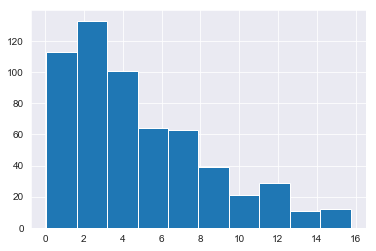

In [4]:
model_df[model_df['Total_weight_(kg)'] < 16]['Total_weight_(kg)'].hist();

In [5]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['total_energy_kWh'] > 0]))
model_df = model_df[model_df['total_energy_kWh'] > 0]
model_df.describe()

Old length: 657
New length: 586


,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.00000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.134367,0.630505,0.087085,0.147051,7.618173,0.25152,0.029147,0.003898,0.026519,0.020462,0.194246,0.007824,0.005555,0.007166,2.284403,0.026384,0.049759,0.222308,2.336210,0.033171,0.101196,0.038166,1.124237,0.085688,0.003022,0.029156,1.762654,0.113937,0.081908,0.126618,0.226881,0.175517,0.019394,0.321509,0.192631,18.868788
std,0.169104,0.278974,0.122657,0.144996,8.125326,0.85164,0.140723,0.029608,0.189857,0.160275,0.457601,0.070767,0.034206,0.068399,0.839638,0.064155,0.181202,0.350437,3.776908,0.087942,0.335554,0.142816,3.570059,0.356283,0.034662,0.212890,5.213870,0.316792,0.332596,0.266703,0.484771,0.448975,0.102026,0.691295,0.841872,23.514974
min,0.000000,0.003579,0.000000,0.000000,0.056000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000
25%,0.017861,0.419896,0.003361,0.039520,2.529000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.742500,0.000000,0.000000,0.036000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.755000
50%,0.068807,0.685711,0.042050,0.103559,4.906000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.620000,0.000000,0.000000,0.101000,0.791000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.010000,0.088000,0.053500,0.000000,0.078000,0.000000,11.000000
75%,0.181555,0.871793,0.110851,0.204231,9.231000,0.08000,0.007000,0.000000,0.000000,0.000000,0.175500,0.000000,0.000000,0.000000,2.970000,0.024000,0.000000,0.258000,3.067500,0.020750,0.000000,0.012000,0.057250,0.000000,0.000000,0.000000,0.663000,0.100000,0.000000,0.130000,0.232000,0.179000,0.005000,0.304750,0.033750,22.677500
max,0.926819,1.000000,0.823762,0.860902,59.815000,8.61200,1.840000,0.356000,3.670000,2.873000,4.242000,1.122000,0.509000,0.862000,3.120000,0.574000,1.580000,3.228000,29.239000,0.912000,5.362000,1.860000,36.750000,4.494000,0.616000,4.306000,56.020000,4.904000,3.280000,2.408000,6.804000,5.256000,2.008000,6.452000,15.806000,175.410000


### Total Weight (kg)

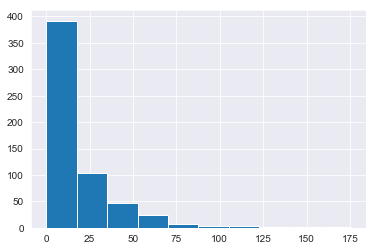

In [6]:
model_df[model_df['total_energy_kWh'] > 0]['total_energy_kWh'].hist();

In [7]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['Total_weight_(kg)'] < 16]))
model_df = model_df[model_df['Total_weight_(kg)'] < 16]
model_df.describe()

Old length: 586
New length: 516


,Non_combust_wt_%,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Total_weight_(kg),aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),energy_kWh_per_kg,eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles,total_energy_kWh
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,0.141575,0.610547,0.090113,0.156637,5.223431,0.199983,0.024217,0.002147,0.030116,0.023238,0.147915,0.005998,0.006309,0.004107,2.227578,0.026977,0.056083,0.179067,1.701150,0.034548,0.091444,0.032537,0.651723,0.062072,0.003432,0.019728,0.896434,0.091599,0.091713,0.112634,0.181076,0.140967,0.015632,0.273866,0.115027,12.109748
std,0.173728,0.283029,0.126608,0.149067,3.635338,0.756555,0.104719,0.022486,0.202081,0.170631,0.331126,0.065309,0.036391,0.049133,0.859181,0.063719,0.192178,0.288849,2.294945,0.083585,0.246646,0.138367,1.984713,0.240087,0.036923,0.114199,2.250055,0.274567,0.352108,0.227172,0.328292,0.382436,0.060521,0.586254,0.414171,10.445627
min,0.000000,0.003579,0.000000,0.000000,0.056000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000
25%,0.019392,0.395613,0.003385,0.044443,2.246500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.145000
50%,0.076120,0.667773,0.043399,0.116282,4.318000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.088000,0.721500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016500,0.000000,0.012000,0.081000,0.052000,0.000000,0.069000,0.000000,9.270000
75%,0.194802,0.861856,0.113435,0.217723,7.429000,0.070500,0.009000,0.000000,0.000000,0.000000,0.150250,0.000000,0.000000,0.000000,2.940000,0.026000,0.000000,0.226500,2.603000,0.027250,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000,0.340750,0.089500,0.000000,0.114250,0.211250,0.160000,0.005000,0.241000,0.020250,16.872500
max,0.926819,1.000000,0.823762,0.860902,15.750000,8.612000,1.840000,0.356000,3.670000,2.873000,2.825000,1.122000,0.509000,0.838000,3.120000,0.574000,1.580000,3.228000,11.976000,0.848000,2.306000,1.860000,15.092000,2.780000,0.616000,1.300000,15.232000,4.904000,3.280000,1.896000,3.338000,5.256000,0.970000,5.308000,4.376000,48.840000


In [8]:
# print('Old length:', len(model_df))
# print('New length:', len(model_df[model_df['total_energy_kWh'] < 150]))
# model_df = model_df[model_df['total_energy_kWh'] < 150]
# model_df.describe()

## Remove Unnecessary Features

In [9]:
# X = model_df.drop(['ID',
#                    'total_energy_kWh',
#                    'energy_kWh_per_kg',
#                    'Total_weight_(kg)',
#                    'Organics_wt_%',
#                    'Paper_and_cardboard_wt_%',
#                    'Plastics_wt_%',
#                    'Non_combust_wt_%'],
#                    axis=1)
# y = model_df[['total_energy_kWh']]

In [11]:
X = model_df.drop(['ID',
                   'total_energy_kWh',
                   'energy_kWh_per_kg',
                   'Total_weight_(kg)',
                   'Organics_wt_%',
                   'Paper_and_cardboard_wt_%',
                   'Plastics_wt_%',
                   'Non_combust_wt_%'], axis=1)
y = model_df[['energy_kWh_per_kg']]

## Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_Scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_Scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

y_train_Scaled = scaler.fit_transform(y_train)
y_test_Scaled = scaler.transform(y_test)

In [14]:
X_train_Scaled.head()

,aluminium_cans,aluminium_recyclable,batteries,bottles_cds,bottles_wine_and_spirits,cardboard,ceramics,drinkbags,electrical_items_and_peripherals_(incl_tvs),eps,feminine_hygiene,flexibles_film,food,hdpe_bottles,jars,lpb,nappies,other,other_glass,other_metal,other_organics,other_plastic,other_sanitary_waste,paper,pet_bottles,plastic_bags,pp,steel_cans,textiles
0,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,1.265438,-0.098466,-0.154106,-0.079706,-0.413417,-0.30746,5.950470,-0.611218,-0.412176,0.861347,-0.170126,-0.332314,0.959775,-0.090284,-0.16923,-0.229082,2.599808,-0.266459,2.736695,0.034459,-0.321770,-0.263237,0.178715,0.629460
1,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,-0.445976,-0.098466,-0.154106,-0.079706,0.294467,-0.30746,0.281862,0.121999,-0.005058,-0.379311,-0.105424,-0.332314,0.122243,-0.090284,-0.16923,-0.398419,-0.332371,3.751712,-0.182397,2.210006,-0.049377,0.106801,-0.472867,-0.276395
2,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,-0.215897,-0.098466,-0.154106,-0.079706,4.636151,-0.30746,-0.367938,1.107798,3.635061,-0.379311,-0.234828,-0.332314,-0.260629,-0.090284,-0.16923,-0.398419,0.074405,3.968911,-0.490546,-0.251950,-0.083733,0.338075,-0.472867,-0.190893
3,-0.235729,-0.228289,-0.103834,-0.14073,-0.136738,-0.445976,-0.098466,-0.154106,-0.079706,-0.413417,-0.30746,0.402679,-0.734281,-0.412176,-0.379311,-0.234828,-0.332314,-0.260629,-0.090284,-0.16923,6.707200,-0.128983,-0.266459,-0.490546,-0.538359,-0.164715,-0.263237,-0.472867,-0.276395
4,-0.270417,-0.228289,-0.103834,-0.14073,-0.136738,-0.124495,-0.098466,-0.154106,-0.079706,-0.413417,-0.30746,-0.191611,-0.310444,0.186528,0.759267,0.160573,-0.332314,5.546261,-0.090284,-0.16923,-0.373695,0.098134,-0.266459,0.317305,-0.448675,-0.351218,-0.263237,-0.375466,-0.174717


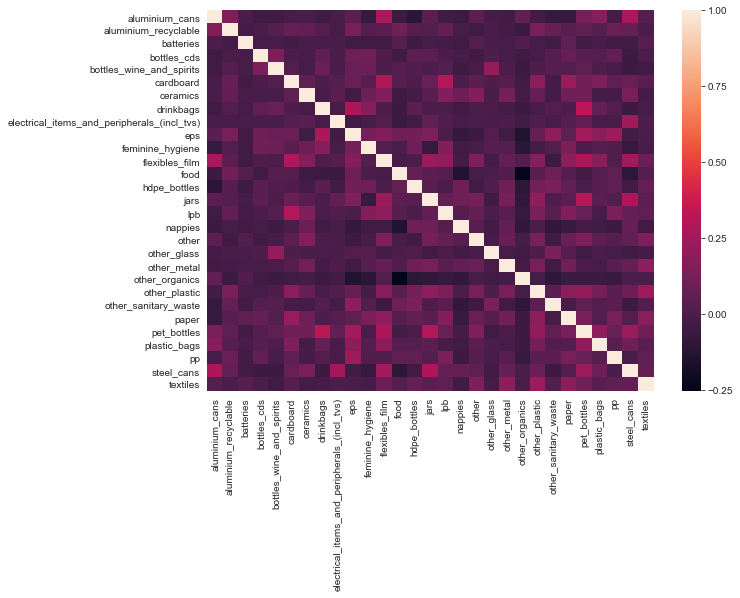

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train_Scaled.corr());

## Statsmodel OLS

In [16]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

X_int = sm.tools.add_constant(X)
model = OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_kWh_per_kg   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     32.02
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           6.53e-94
Time:                        11:32:16   Log-Likelihood:                -377.73
No. Observations:                 516   AIC:                             815.5
Df Residuals:                     486   BIC:                             942.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           2.1585      0.043     49.881      0.000       2.074       2.244
aluminium_cans                                 -0.2035      0.034     -6.003      0.000      -0.270      -0.137
aluminium_recyclable                           -0.3243      0.229     -1.418      0.157      -0.774       0.125
batteries                                      -2.1234      1.024     -2.074      0.039      -4.135      -0.112
bottles_cds                                    -0.4972      0.116     -4.296      0.000      -0.725      -0.270
bottles_wine_and_spirits                       -0.4632      0.136     -3.396      0.001      -0.731      -0.195
cardboard                                      -0.2559      0.076     -3.380      0.001      -0.405      -0.107
ceramics                                       -0.0999      0.371     -0.269      0.788      -0.829       0.629
drinkbags                                      -0.5219      0.704     -0.741      0.459      -1.905       0.861
electrical_items_and_peripherals_(incl_tvs)    -1.1816      0.481     -2.456      0.014      -2.127      -0.236
eps                                            -0.0338      0.424     -0.080      0.936      -0.866       0.799
feminine_hygiene                                0.3821      0.127      3.002      0.003       0.132       0.632
flexibles_film                                 -0.1973      0.094     -2.094      0.037      -0.382      -0.012
food                                            0.1643      0.011     15.456      0.000       0.143       0.185
hdpe_bottles                                   -0.2407      0.287     -0.839      0.402      -0.804       0.323
jars                                           -0.4169      0.104     -3.992      0.000      -0.622      -0.212
lpb                                             0.0457      0.182      0.251      0.802      -0.312       0.404
nappies                                         0.1183      0.012      9.870      0.000       0.095       0.142
other                                          -0.2913      0.100     -2.914      0.004      -0.488      -0.095
other_glass                                    -0.9989      0.628     -1.589      0.113      -2.234       0.236
other_metal                                    -0.2867      0.212     -1.353      0.177      -0.703       0.130
other_organics                                  0.1253      0.011     11.580      0.000       0.104       0.147
other_plastic                                  -0.1040      0.092     -1.131      0.259      -0.285       0.077
other_sanitary_waste                            0.2824      0.069      4.119      0.000       0.148       0.417
paper                                          -0.2425     

In [17]:
# from statsmodels.regression.linear_model import OLS
# import statsmodels.api as sm
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# plt.style.use('ggplot')

# X_int = sm.tools.add_constant(X)
# model = OLS(y, X_int).fit()
# model.summary()

In [18]:
#
# results = []
# print('Model Residuals Plot')
# print('--------------------')
# fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
# plt.show()
# for idx, column in enumerate(X.columns):
#     print(f'Belize MSW Regression Plot for {column} Feature')
#     print('------------------------------------------------')
    
#     fig, axes = plt.subplots(figsize=(15,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig.tight_layout()
#     plt.show()
    
#     input('Press ENTER to continue...')

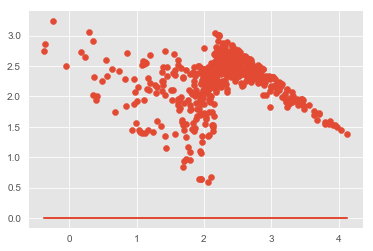

In [19]:
# Plot redisuals from Statsmodel OLS
plt.scatter(model.predict(X_int), scaler.inverse_transform(model.resid))
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

In [20]:
model.predict(X_int)

0      2.125332
1      2.428816
2      2.614348
3      2.143678
4      2.610926
5      2.874390
6      2.297044
7      1.541377
8      1.771196
9      2.418981
10     2.055725
12     2.179512
13     1.806501
14     2.809967
15     0.978560
16     2.477922
17     2.023130
18     3.385116
19     2.580472
20     2.817343
21     1.953351
22     2.056655
23     1.963994
24     2.457757
25     2.140835
26     1.164597
27     2.069993
28     1.655710
29     2.101448
30     2.542295
31     1.683270
32     2.321586
33     2.093886
34     1.246383
35     2.427249
36     1.835000
37     2.551097
38     2.717292
39     2.348813
40     2.553973
41     2.504539
42     2.463856
43     2.068502
44     2.067374
45     2.157760
46     2.286300
47     2.204454
48     3.280003
49     2.230515
50     2.328505
51     2.006140
52     1.739130
53     2.692762
54     1.291793
55     2.582487
56     1.131684
57     2.121626
58     2.981542
59     2.277684
60     3.638292
61     2.868893
62     2.747697
63     1

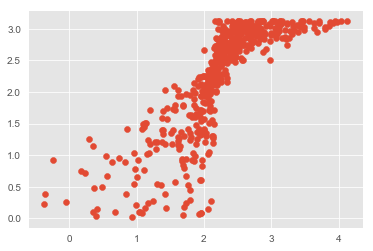

In [21]:
plt.scatter(model.predict(X_int), y)

In [22]:
model.resid.mean()

-6.850678508539726e-16

## Scikit Learn LinearRegression Model

In [23]:
from sklearn.linear_model import LinearRegression, LassoCV
linreg = LinearRegression()
linreg.fit(X_train_Scaled, y_train_Scaled)

y_hat_train_scaled = linreg.predict(X_train_Scaled)
y_hat_test_scaled = linreg.predict(X_test_Scaled)

train_residuals = scaler.inverse_transform(y_hat_train_scaled) - y_train
test_residuals = scaler.inverse_transform(y_hat_test_scaled) - y_test

train_mse = mean_squared_error(y_train, scaler.inverse_transform(y_hat_train_scaled))
test_mse = mean_squared_error(y_test, scaler.inverse_transform(y_hat_test_scaled))

print('Train RMSE:', np.sqrt(train_mse))
print('------------------------------')
print('Test RMSE:', np.sqrt(test_mse))
linreg.score(X_test_Scaled, y_test_Scaled)

Train RMSE: 0.49745306603043815
------------------------------
Test RMSE: 0.5471072210302643


0.6156898871389254

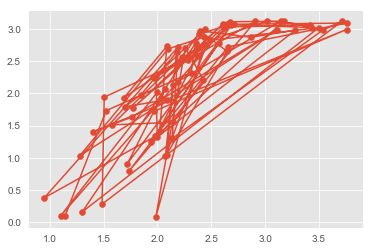

In [24]:
plt.scatter(scaler.inverse_transform(y_hat_test_scaled), y_test)
plt.plot(scaler.inverse_transform(y_hat_test_scaled), y_test);

Sklearn Model Intercept: [-6.60619538e-17]


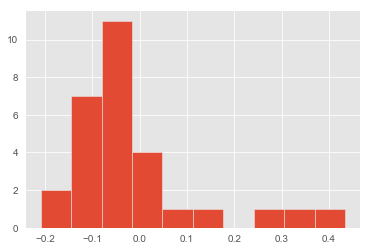

In [25]:
sklearn_results = pd.DataFrame()
sklearn_results['Item'] = [x for x in X_train_Scaled.columns]
sklearn_results['Coef'] = [x for x in linreg.coef_[0]]
print('Sklearn Model Intercept:', linreg.intercept_)
sklearn_results['Coef'].hist();

## Decision Tree Regressor

### Baseline Model

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [27]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 0.6414986460005296
R-sq Score: 0.4716418545432719


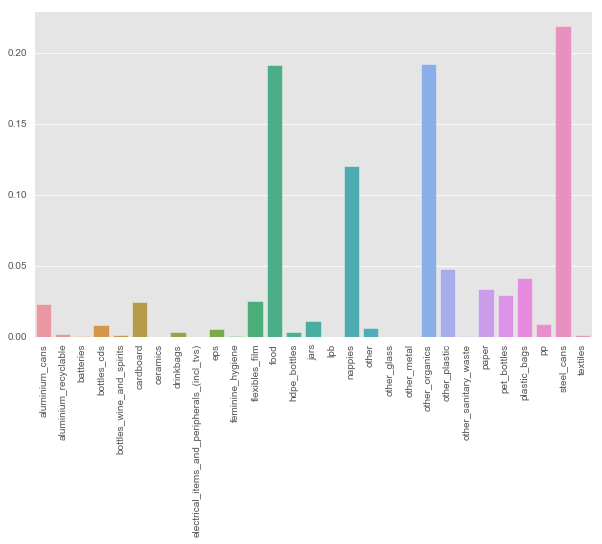

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

### Optimized Model

In [29]:
op_regressor = DecisionTreeRegressor(random_state=42,
                                     max_depth=4,
                                     min_samples_leaf=2,
                                     min_samples_split=4)
op_regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [30]:
y_pred = op_regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 0.6129616958543077
R-sq Score: 0.5176041184195483


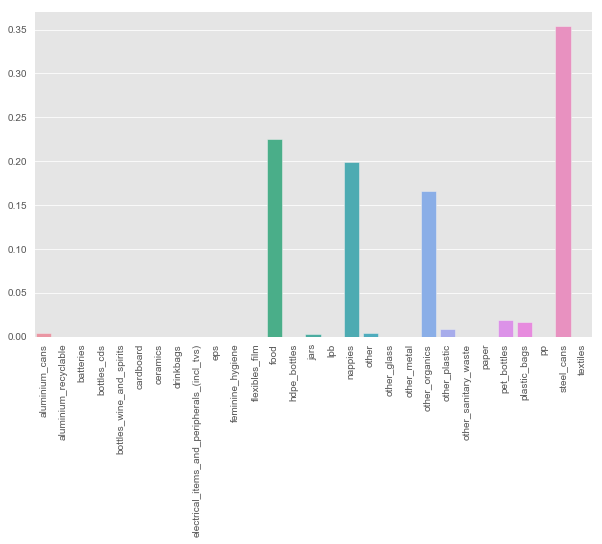

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, op_regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

## Random Forest Model

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus
from sklearn.pipeline import Pipeline

### Baseline Model

In [33]:
rdm_forest = RandomForestRegressor(200, random_state=42)

In [34]:
rdm_forest.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
rdm_forest.score(X_train_Scaled, y_train_Scaled)

0.9637235727710164

In [36]:
rdm_forest.score(X_test_Scaled, y_test_Scaled)

0.7525967273498192

In [37]:
y_preds = rdm_forest.predict(X_test_Scaled)
y_preds

array([ 0.68431537, -0.93838825,  0.78645176, -1.24356757, -0.79256278,
       -0.37353419,  0.5885625 , -0.43233289, -0.42876046,  0.70645273,
       -1.13001111,  0.37726199,  0.60941144,  0.45181452, -0.99109625,
        0.22358889, -0.11520642,  0.2380543 , -0.10308358, -0.15596728,
       -1.78452734,  0.91177967,  1.02498474, -1.05510719, -0.02531   ,
        0.76378732,  0.88548423,  0.52847538,  1.03084118,  0.02663666,
       -0.28861574, -0.7253308 ,  0.32560815,  0.36970717,  0.64320313,
        0.29480325, -1.38675763, -0.43385556,  0.59307196, -1.36748993,
       -0.09506025,  0.45632399, -0.16703596,  0.56092008, -0.21019795,
        0.55676201,  0.65784424,  0.2512313 ,  1.01760562, -1.08544357,
       -0.78863897,  0.47061371, -0.20205749,  0.36355791,  0.73760901,
       -0.58735297,  0.63746381,  0.86879337,  0.96261361, -0.06390397,
        0.45029185, -0.30214413,  0.58270606,  0.25890325,  0.4233522 ,
       -0.01418276, -0.53124823,  1.02299355,  0.47049658, -0.85

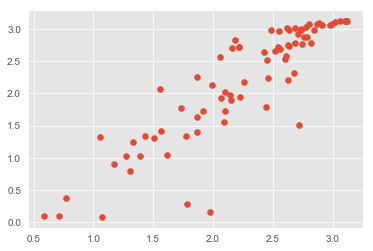

In [38]:
# Plot redisuals from Random Forest

plt.scatter(scaler.inverse_transform(rdm_forest.predict(X_test_Scaled)), y_test);
# plt.plot(scaler.inverse_transform(rdm_forest.predict(X_test_Scaled)), y_test);

In [39]:
np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_preds)))

0.43896941354226604

### GridSearch

In [40]:
rf_grid_reg = RandomForestRegressor(random_state=42)
grid_param = [{'n_estimators': [150, 200, 250, 300],
               'max_depth': [13, 15, 17, 20],
               'min_samples_split': [2, 3, 4, 5],
               'min_samples_leaf': [1, 2, 3]}]

In [41]:
# rf_gridsearch = GridSearchCV(rf_grid_reg, grid_param, cv=3)
# rf_gridsearch.fit(X_train_Scaled, y_train_Scaled)

In [42]:
# rf_gridsearch.best_params_

In [43]:
# rf_gridsearch.score(X_test_Scaled, y_test_Scaled)

In [44]:
optimal_rf_model = RandomForestRegressor(max_depth=20,
                                         min_samples_leaf=1,
                                         min_samples_split=3,
                                         n_estimators=200,
                                         random_state=42)
optimal_rf_model.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
optimal_rf_model.score(X_train_Scaled, y_train_Scaled)

0.9609207525084612

In [46]:
optimal_rf_model.score(X_test_Scaled, y_test_Scaled)

0.749441990615014

In [47]:
y_preds = optimal_rf_model.predict(X_test_Scaled)
y_preds

array([ 0.68778531, -0.92485666,  0.75552813, -1.2575073 , -0.78418068,
       -0.36214731,  0.5509269 , -0.41168697, -0.42767158,  0.71024652,
       -1.13272041,  0.36000988,  0.58378155,  0.43777983, -0.99764013,
        0.21003944, -0.09407791,  0.22108672, -0.11536538, -0.15745384,
       -1.82117892,  0.90982582,  1.02547828, -0.99878144, -0.03147489,
        0.75267067,  0.89107519,  0.51727382,  1.03093008, -0.01778411,
       -0.32753446, -0.64675391,  0.33340307,  0.40564294,  0.65362174,
        0.26127706, -1.31950237, -0.41311301,  0.5995114 , -1.34762153,
       -0.0794195 ,  0.43765155, -0.13339849,  0.55818805, -0.19955338,
        0.55360573,  0.6735416 ,  0.27118295,  1.01706606, -1.08530483,
       -0.79722061,  0.47488306, -0.20944749,  0.35935089,  0.75066832,
       -0.60151999,  0.63222494,  0.85381412,  0.9595554 , -0.10413886,
        0.46022312, -0.29826326,  0.59179366,  0.2891218 ,  0.42042319,
        0.02915884, -0.52417853,  1.02285013,  0.51838654, -0.82

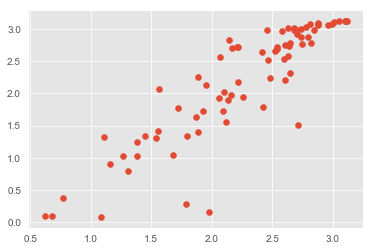

In [48]:
plt.scatter(scaler.inverse_transform(optimal_rf_model.predict(X_test_Scaled)), y_test);

In [49]:
np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_preds)))

0.44175928411644894

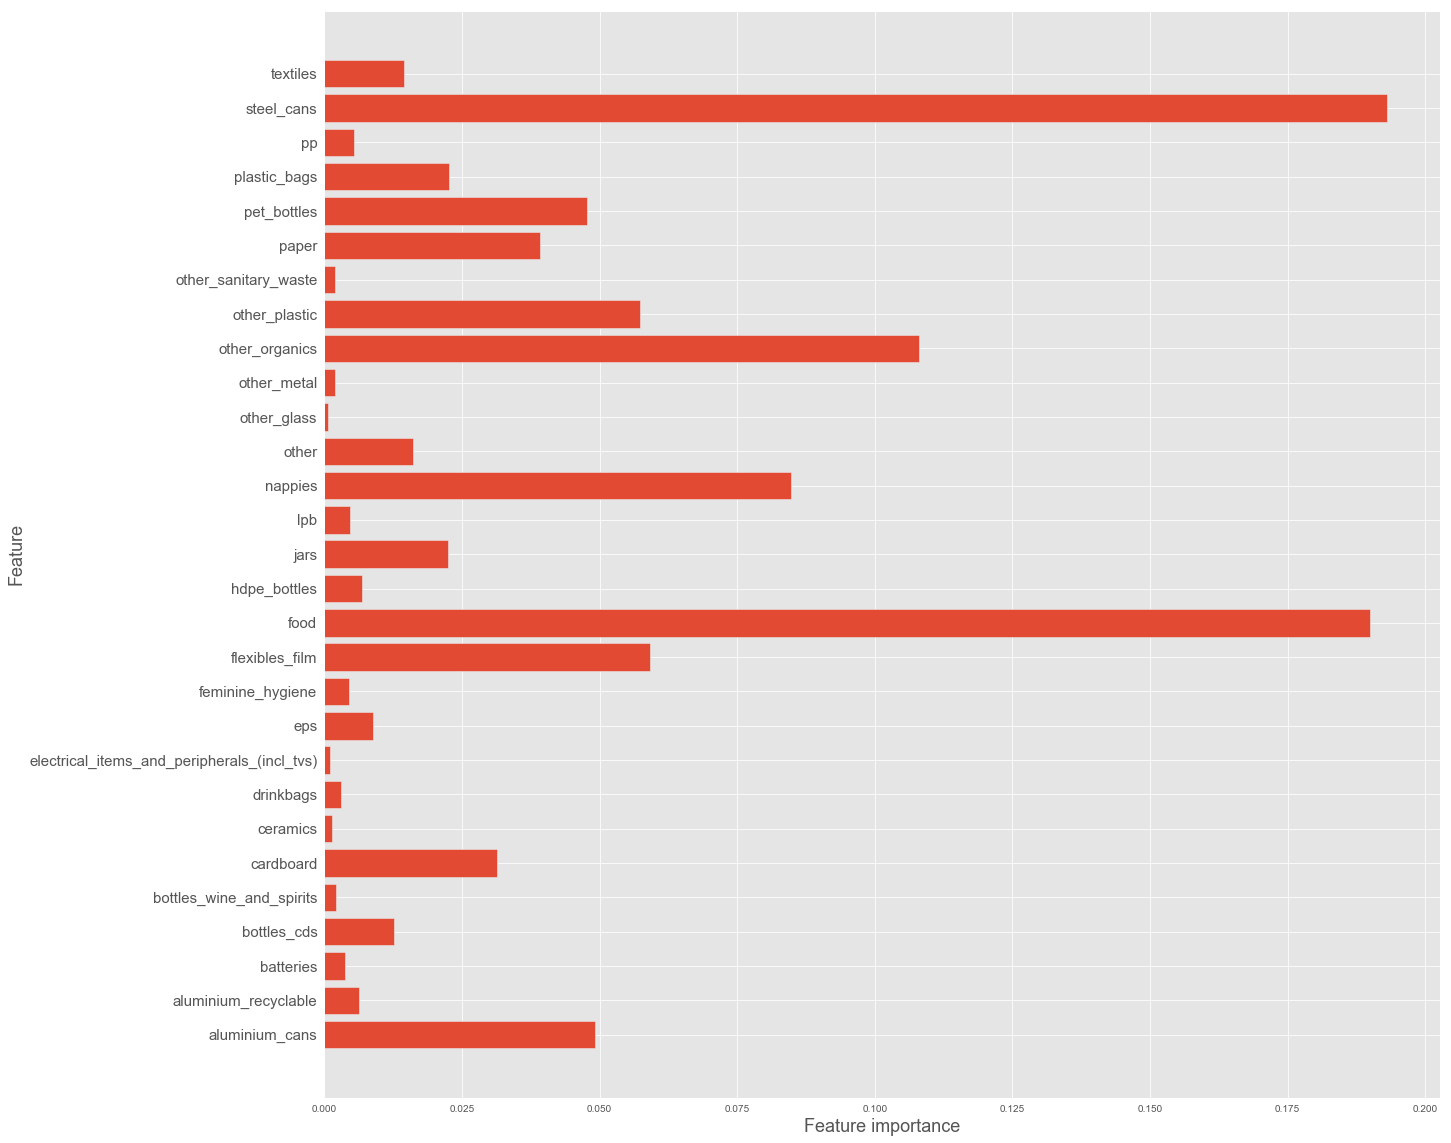

In [50]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance', fontsize=18)
    plt.yticks(fontsize=15)
    plt.ylabel('Feature', fontsize=18)
    plt.yticks(fontsize=15)

plot_feature_importances(optimal_rf_model)

## XG Boost

In [51]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train_Scaled, y_train_Scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
xgb_reg.score(X_train_Scaled, y_train_Scaled)

0.946750421284703

In [53]:
xgb_reg.score(X_test_Scaled, y_test_Scaled)

0.8374254521212664

In [54]:
training_preds = scaler.inverse_transform(xgb_reg.predict(X_train_Scaled))
test_preds = scaler.inverse_transform(xgb_reg.predict(X_test_Scaled))

In [55]:
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, training_preds)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))

Train RMSE: 0.19701263136768798
Test RMSE: 0.35584250603316425


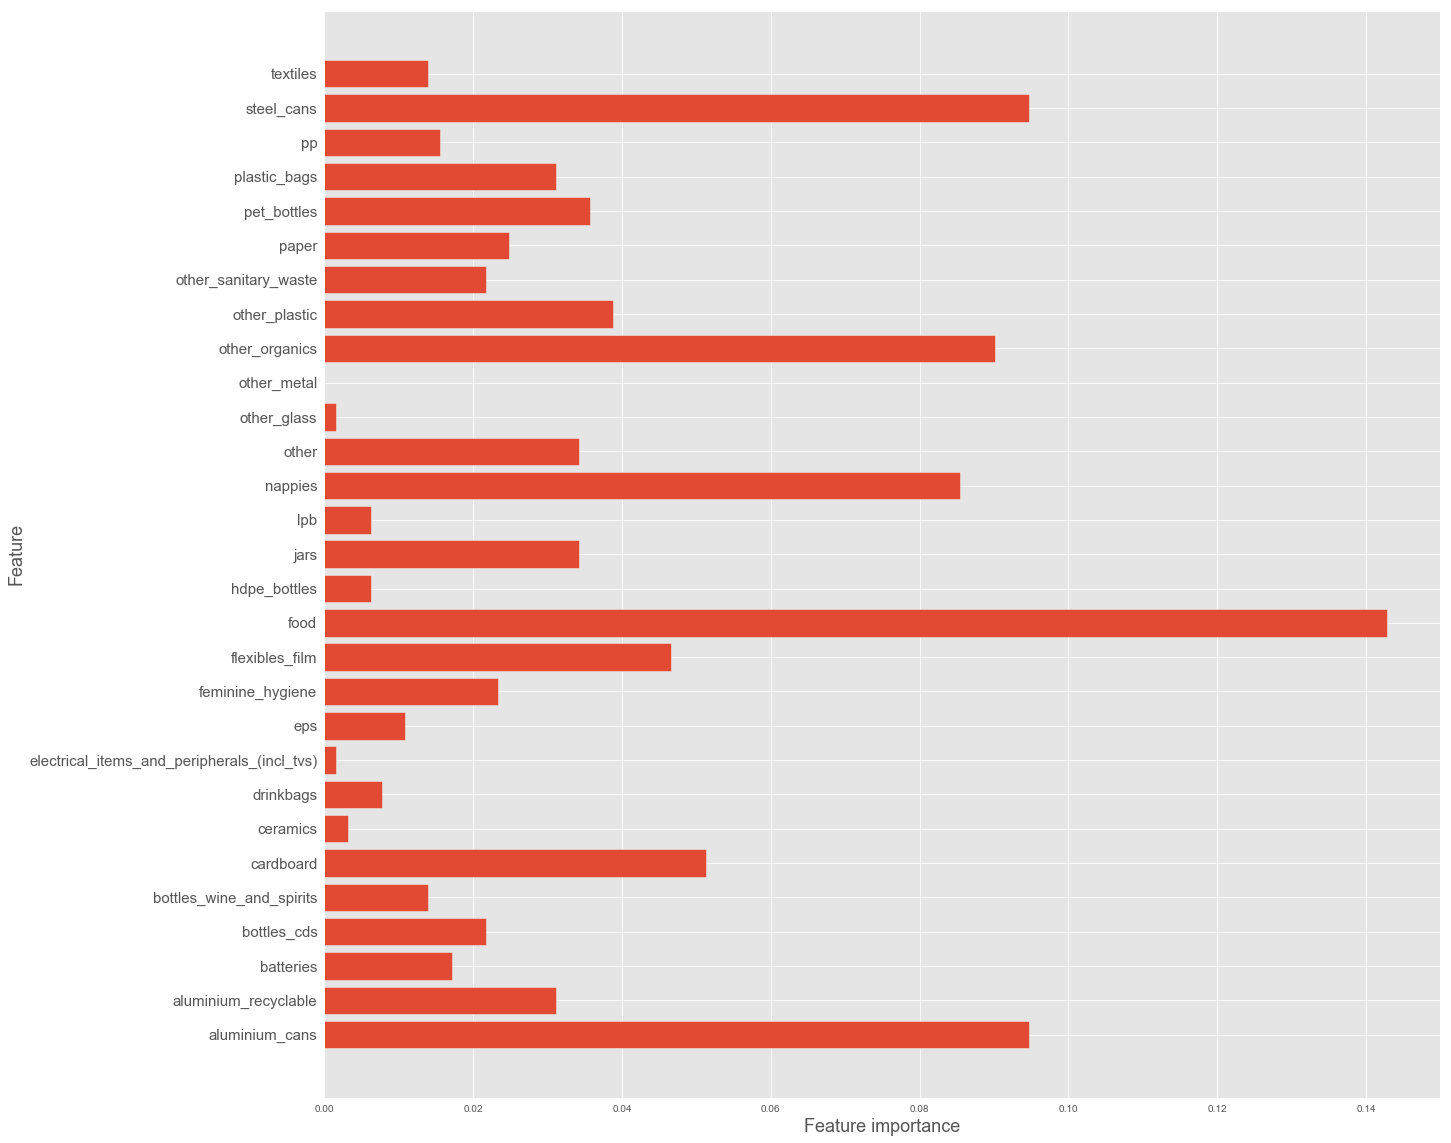

In [56]:
plot_feature_importances(xgb_reg)

### GridSearch

In [57]:
xgb_grid_model = xgb.XGBRegressor(random_state=42)

xgb_reg_grid_param = [{'max_depth': [5, 7, 10, 12],
               'learning_rate': [0.1, 0.2],
               'n_estimators': [100, 150, 200],
               'min_child_weight': [2, 3, 4],
               'max_delta_step': [0, 1]}]

In [58]:
xgbclf_gridsearch = GridSearchCV(xgb_grid_model,
                                 xgb_reg_grid_param,
                                 scoring='neg_mean_squared_error')
xgbclf_gridsearch.fit(X_train_Scaled, y_train_Scaled)

KeyboardInterrupt: 

In [ ]:
xgbclf_gridsearch.best_params_

In [59]:
xgb_grid_model = xgb.XGBRegressor(learning_rate = 0.1,
                                  max_delta_step = 1,
                                  max_depth = 5,
                                  min_child_weight = 3,
                                  n_estimators = 200,
                                  random_state=42)
xgb_grid_model.fit(X_train_Scaled, y_train_Scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=1,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
xgb_grid_model.score(X_train_Scaled, y_train_Scaled)

0.9981781497453177

In [61]:
xgb_grid_model.score(X_test_Scaled, y_test_Scaled)

0.8738270923835171

In [62]:
training_preds = scaler.inverse_transform(xgb_grid_model.predict(X_train_Scaled))
test_preds = scaler.inverse_transform(xgb_grid_model.predict(X_test_Scaled))

In [63]:
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, training_preds)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))

Train RMSE: 0.03644116707933983
Test RMSE: 0.3134834245996956


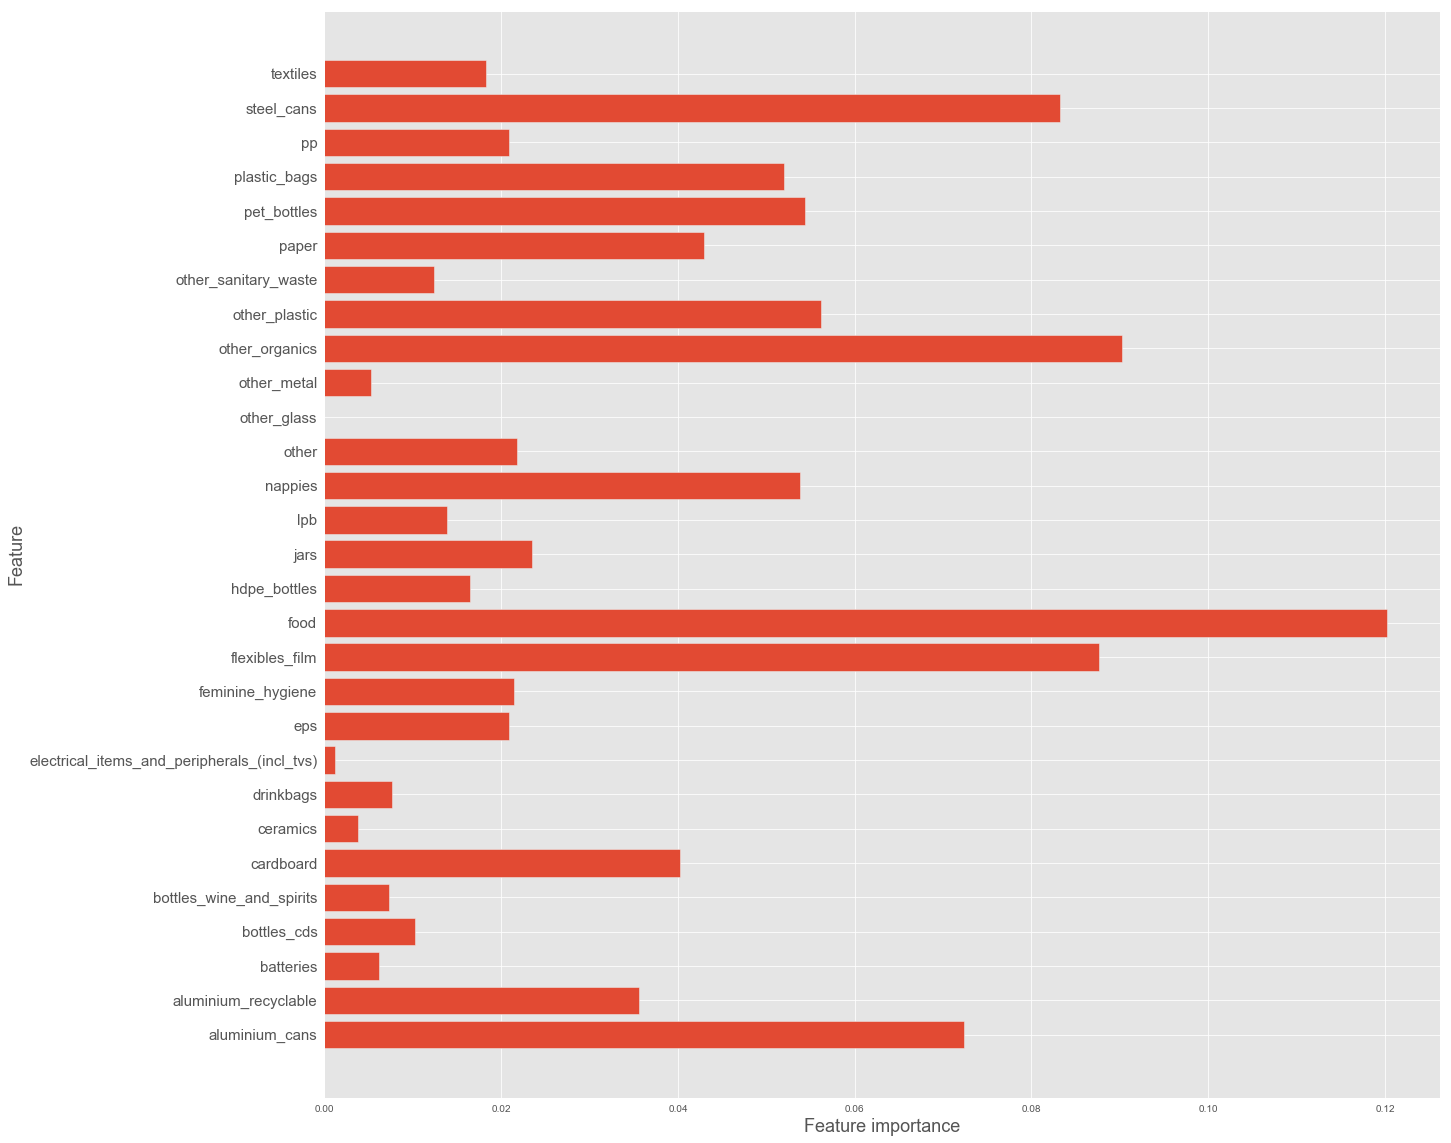

In [64]:
plot_feature_importances(xgb_grid_model)

## MLP Regression Model

In [65]:
from keras import layers, models, optimizers, regularizers
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor

In [66]:
n_features = X_train_Scaled.shape[1]

### Loss, MSE, & R^2 Visualization Function

In [67]:
def coef_determination(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [68]:
#Build vizualization function for training/validation loss and accuracy
def visualize_loss_MSE(results):
    history = results.history
    
    plt.plot(history['loss'], 'b', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['mse'], 'b', label='Training MSE')
    plt.title('Training MSE')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['coef_determination'], 'b', label='Training R^2')
    plt.title('Training R^2')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R^2', fontsize=12)
    plt.legend(loc='best')
    plt.show()

### Baseline Model

In [69]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

baseline_model.add(layers.Dense(5, activation='relu'))

baseline_model.add(layers.Dense(1, activation='linear'))

baseline_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [70]:
baseline_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
14/14 [==============================] - 0s 846us/step - loss: 1.0629 - mse: 1.0629 - coef_determination: -0.1266
Epoch 2/150
14/14 [==============================] - 0s 712us/step - loss: 0.9207 - mse: 0.9207 - coef_determination: 0.0593
Epoch 3/150
14/14 [==============================] - 0s 712us/step - loss: 0.8346 - mse: 0.8346 - coef_determination: 0.1569
Epoch 4/150
14/14 [==============================] - 0s 641us/step - loss: 0.7755 - mse: 0.7755 - coef_determination: 0.1780
Epoch 5/150
14/14 [==============================] - 0s 712us/step - loss: 0.7304 - mse: 0.7304 - coef_determination: 0.2549
Epoch 6/150
14/14 [==============================] - 0s 784us/step - loss: 0.6918 - mse: 0.6918 - coef_determination: 0.2862
Epoch 7/150
14/14 [==============================] - 0s 641us/step - loss: 0.6611 - mse: 0.6611 - coef_determination: 0.3011
Epoch 8/150
14/14 [==============================] - 0s 784us/step - loss: 0.6308 - mse: 0.6308 - coef_determination: 0.3202

14/14 [==============================] - 0s 712us/step - loss: 0.1684 - mse: 0.1684 - coef_determination: 0.8277
Epoch 66/150
14/14 [==============================] - 0s 644us/step - loss: 0.1666 - mse: 0.1666 - coef_determination: 0.8267
Epoch 67/150
14/14 [==============================] - 0s 712us/step - loss: 0.1660 - mse: 0.1660 - coef_determination: 0.8171
Epoch 68/150
14/14 [==============================] - 0s 712us/step - loss: 0.1634 - mse: 0.1634 - coef_determination: 0.8336
Epoch 69/150
14/14 [==============================] - 0s 712us/step - loss: 0.1610 - mse: 0.1610 - coef_determination: 0.8322
Epoch 70/150
14/14 [==============================] - 0s 641us/step - loss: 0.1596 - mse: 0.1596 - coef_determination: 0.8330
Epoch 71/150
14/14 [==============================] - 0s 641us/step - loss: 0.1575 - mse: 0.1575 - coef_determination: 0.8384
Epoch 72/150
14/14 [==============================] - 0s 713us/step - loss: 0.1580 - mse: 0.1580 - coef_determination: 0.8385
Epoch

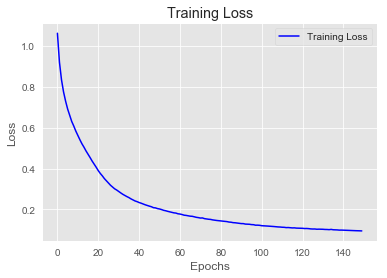

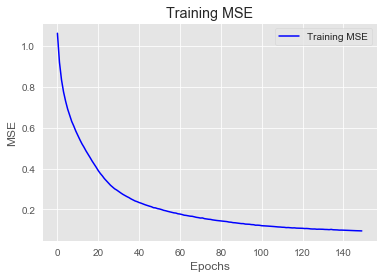

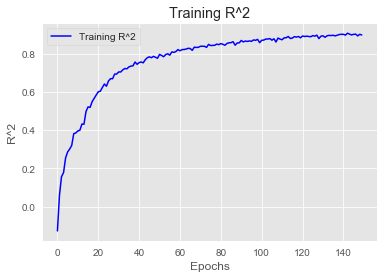

In [71]:
visualize_loss_MSE(baseline_model.history)

In [72]:
baseline_preds_scaled = baseline_model.predict(X_test_Scaled)
baseline_preds = scaler.inverse_transform(baseline_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print('RMSE:', rmse)
print('-------------------------')
print(baseline_model.summary())

RMSE: 0.39000057590681964
-------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


### Overfit Model

In [73]:
overfit_model = Sequential()

overfit_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(1, activation='linear'))

overfit_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [74]:
overfit_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
14/14 [==============================] - 0s 781us/step - loss: 0.9437 - mse: 0.9437 - coef_determination: 0.0340
Epoch 2/150
14/14 [==============================] - 0s 639us/step - loss: 0.8456 - mse: 0.8456 - coef_determination: 0.1332
Epoch 3/150
14/14 [==============================] - 0s 710us/step - loss: 0.8159 - mse: 0.8159 - coef_determination: 0.0940
Epoch 4/150
14/14 [==============================] - 0s 644us/step - loss: 0.7782 - mse: 0.7782 - coef_determination: 0.2053
Epoch 5/150
14/14 [==============================] - 0s 712us/step - loss: 0.7485 - mse: 0.7485 - coef_determination: 0.2226
Epoch 6/150
14/14 [==============================] - 0s 712us/step - loss: 0.7178 - mse: 0.7178 - coef_determination: 0.2406
Epoch 7/150
14/14 [==============================] - 0s 639us/step - loss: 0.6894 - mse: 0.6894 - coef_determination: 0.2888
Epoch 8/150
14/14 [==============================] - 0s 712us/step - loss: 0.6590 - mse: 0.6590 - coef_determination: 0.3245


14/14 [==============================] - 0s 784us/step - loss: 0.1060 - mse: 0.1060 - coef_determination: 0.8889
Epoch 131/150
14/14 [==============================] - 0s 784us/step - loss: 0.1055 - mse: 0.1055 - coef_determination: 0.8874
Epoch 132/150
14/14 [==============================] - 0s 784us/step - loss: 0.1047 - mse: 0.1047 - coef_determination: 0.8932
Epoch 133/150
14/14 [==============================] - 0s 784us/step - loss: 0.1042 - mse: 0.1042 - coef_determination: 0.8916
Epoch 134/150
14/14 [==============================] - 0s 784us/step - loss: 0.1031 - mse: 0.1031 - coef_determination: 0.8882
Epoch 135/150
14/14 [==============================] - 0s 784us/step - loss: 0.1030 - mse: 0.1030 - coef_determination: 0.8882
Epoch 136/150
14/14 [==============================] - 0s 716us/step - loss: 0.1018 - mse: 0.1018 - coef_determination: 0.8947
Epoch 137/150
14/14 [==============================] - 0s 786us/step - loss: 0.1009 - mse: 0.1009 - coef_determination: 0.892

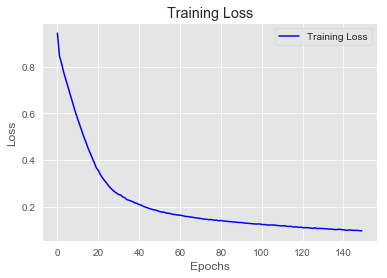

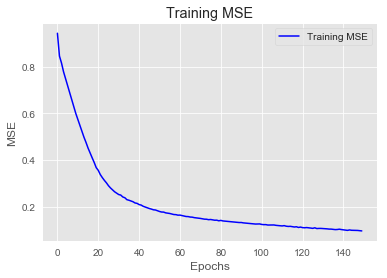

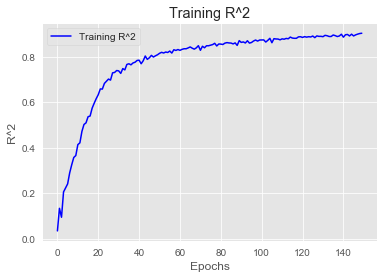

In [75]:
visualize_loss_MSE(overfit_model.history)

In [76]:
overfit_preds_scaled = overfit_model.predict(X_test_Scaled)
overfit_preds = scaler.inverse_transform(overfit_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, overfit_preds))

print('RMSE:', rmse)
print('-------------------------')
print(overfit_model.summary())

RMSE: 0.45329459840206215
-------------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None


### Regularized Model

In [77]:
reg_model = Sequential()

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(1, activation='linear'))

reg_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [78]:
reg_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
14/14 [==============================] - 0s 816us/step - loss: 1.2817 - mse: 1.0070 - coef_determination: -0.0374
Epoch 2/150
14/14 [==============================] - 0s 784us/step - loss: 1.2719 - mse: 0.9980 - coef_determination: -0.0272
Epoch 3/150
14/14 [==============================] - 0s 783us/step - loss: 1.2623 - mse: 0.9891 - coef_determination: -0.0209
Epoch 4/150
14/14 [==============================] - 0s 784us/step - loss: 1.2520 - mse: 0.9795 - coef_determination: -0.0104
Epoch 5/150
14/14 [==============================] - 0s 712us/step - loss: 1.2406 - mse: 0.9687 - coef_determination: 9.0961e-04
Epoch 6/150
14/14 [==============================] - 0s 641us/step - loss: 1.2288 - mse: 0.9575 - coef_determination: -0.0134
Epoch 7/150
14/14 [==============================] - 0s 715us/step - loss: 1.2110 - mse: 0.9402 - coef_determination: 0.0068
Epoch 8/150
14/14 [==============================] - 0s 715us/step - loss: 1.1864 - mse: 0.9160 - coef_determination

14/14 [==============================] - 0s 712us/step - loss: 0.3927 - mse: 0.1489 - coef_determination: 0.8507
Epoch 67/150
14/14 [==============================] - 0s 644us/step - loss: 0.3898 - mse: 0.1466 - coef_determination: 0.8516
Epoch 68/150
14/14 [==============================] - 0s 712us/step - loss: 0.3881 - mse: 0.1453 - coef_determination: 0.8512
Epoch 69/150
14/14 [==============================] - 0s 713us/step - loss: 0.3848 - mse: 0.1425 - coef_determination: 0.8531
Epoch 70/150
14/14 [==============================] - 0s 712us/step - loss: 0.3815 - mse: 0.1397 - coef_determination: 0.8584
Epoch 71/150
14/14 [==============================] - 0s 641us/step - loss: 0.3814 - mse: 0.1400 - coef_determination: 0.8527
Epoch 72/150
14/14 [==============================] - 0s 713us/step - loss: 0.3786 - mse: 0.1377 - coef_determination: 0.8648
Epoch 73/150
14/14 [==============================] - 0s 712us/step - loss: 0.3772 - mse: 0.1367 - coef_determination: 0.8452
Epoch

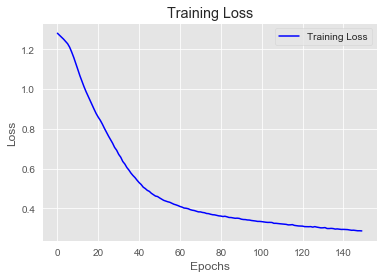

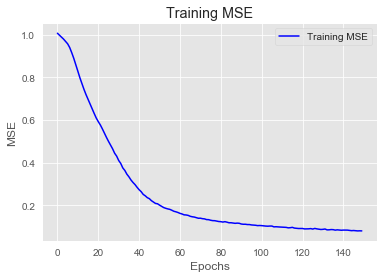

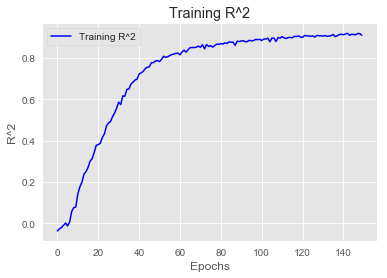

In [79]:
visualize_loss_MSE(reg_model.history)

In [80]:
reg_preds_scaled = reg_model.predict(X_test_Scaled)
reg_preds = scaler.inverse_transform(reg_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, reg_preds))

print('RMSE:', rmse)
print('-------------------------')
print(reg_model.summary())

RMSE: 0.3120995088019562
-------------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 751
Trainable params: 751
Non-trainable params: 0
_____

### Optimized Model

In [91]:
optimized_model = Sequential()

optimized_model.add(layers.Dense(45,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

optimized_model.add(layers.Dense(15,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

optimized_model.add(layers.Dense(3,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

optimized_model.add(layers.Dense(1, activation='linear'))

optimized_model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mse', coef_determination])

In [92]:
import time

# NAME = 'Optimal Model -relu- Layers(D34L2 & D15L2 & D3L2)'

# tensorboard = TensorBoard(log_dir='logs/fit/' + NAME,
#                           histogram_freq=1,
#                           write_graph=True,
#                           write_images=True)

# callbacks = [tensorboard]


optimized_model.fit(X_train_Scaled,
                     y_train_Scaled,
                     epochs=150,
                     batch_size=15)
# ,
#                      callbacks = callbacks)

Epoch 1/150
30/30 [==============================] - 0s 798us/step - loss: 1.2554 - mse: 0.9652 - coef_determination: -0.1977
Epoch 2/150
30/30 [==============================] - 0s 797us/step - loss: 1.1530 - mse: 0.8829 - coef_determination: -0.0183
Epoch 3/150
30/30 [==============================] - 0s 764us/step - loss: 1.0763 - mse: 0.8235 - coef_determination: -1.0849
Epoch 4/150
30/30 [==============================] - 0s 800us/step - loss: 1.0178 - mse: 0.7819 - coef_determination: 0.1159
Epoch 5/150
30/30 [==============================] - 0s 765us/step - loss: 0.9534 - mse: 0.7330 - coef_determination: 0.2792
Epoch 6/150
30/30 [==============================] - 0s 764us/step - loss: 0.8932 - mse: 0.6857 - coef_determination: 0.2819
Epoch 7/150
30/30 [==============================] - 0s 731us/step - loss: 0.8294 - mse: 0.6327 - coef_determination: 0.3224
Epoch 8/150
30/30 [==============================] - 0s 731us/step - loss: 0.7548 - mse: 0.5664 - coef_determination: 0.41

30/30 [==============================] - 0s 665us/step - loss: 0.1298 - mse: 0.0533 - coef_determination: 0.9370
Epoch 67/150
30/30 [==============================] - 0s 665us/step - loss: 0.1280 - mse: 0.0519 - coef_determination: 0.9315
Epoch 68/150
30/30 [==============================] - 0s 766us/step - loss: 0.1253 - mse: 0.0498 - coef_determination: 0.9345
Epoch 69/150
30/30 [==============================] - 0s 710us/step - loss: 0.1258 - mse: 0.0509 - coef_determination: 0.9391
Epoch 70/150
30/30 [==============================] - 0s 698us/step - loss: 0.1278 - mse: 0.0535 - coef_determination: 0.9391
Epoch 71/150
30/30 [==============================] - 0s 700us/step - loss: 0.1229 - mse: 0.0490 - coef_determination: 0.9466
Epoch 72/150
30/30 [==============================] - 0s 665us/step - loss: 0.1252 - mse: 0.0521 - coef_determination: 0.9440
Epoch 73/150
30/30 [==============================] - 0s 749us/step - loss: 0.1248 - mse: 0.0521 - coef_determination: 0.9358
Epoch

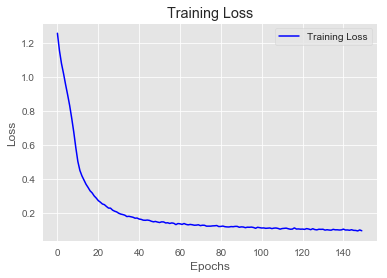

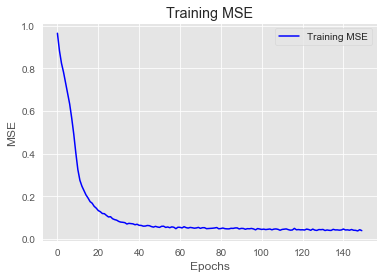

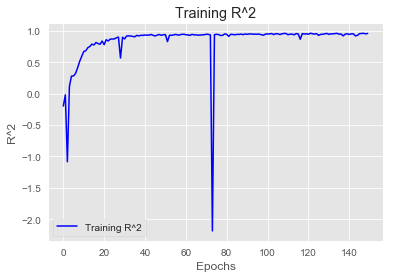

In [93]:
visualize_loss_MSE(optimized_model.history)

In [94]:
op_preds_scaled = optimized_model.predict(X_test_Scaled)
op_preds = scaler.inverse_transform(op_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, op_preds))

print('RMSE:', rmse)
print('-------------------------')
print(optimized_model.summary())

RMSE: 0.23514818247437985
-------------------------
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 45)                1350      
_________________________________________________________________
dense_23 (Dense)             (None, 15)                690       
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 48        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 4         
Total params: 2,092
Trainable params: 2,092
Non-trainable params: 0
_________________________________________________________________
None
